In [33]:
'''
Når vi skal regne med punktladninger og konfigurasjoner av punktladninger, passer det godt å bruke objektorientert programmering.
En ladning har egenskapen at den har en elektrisk ladning og den har en plassering.
I tillegg er det lagt inn en egenskap slik at objektet har et navn.
I eksempelkoden under er det implementert en konstruktør, og en metode som regner ut det elektriske feltet fra en punktladning og det elektriske potensialet fra en punktladning.

Objektet Ladninger() er et objekt som inneholder en samling ladninger.
Objektet har en konstruktør, en metode for å legge til ladninger og en metode som summerer opp feltet fra alle punktladningene.

Det elektriske feltet fra en punktladning er gitt ved:

E =kq/r**2 * r^ 
Det elektriske potensialet fra en punktladning er gitt ved:

E =kq/r**2 * r^ 
For å finne  r , må vi vite hvor ladningen er plassert og koordinatene til punktet der vi skal finne feltet.  r^  kan regnes ut fra  r⃗  .
'''
print("Stillhet")

Stillhet


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.integrate import ode as ode
from scipy.optimize import fsolve

In [17]:
# klasse som inneholder all informasjon om en punktladning. 
# objektet vet hvordan det regner ut feltet fra seg selv i en gitt koordinat
class Ladning:
    def __init__(self,ladning,posisjon,navn="Q",stille=True): # konstruktør
        self.ladning=ladning
        self.posisjon=posisjon
        self.navn=navn
        self._k_=8.988e9   # konstant 1/4\pi \epsilon_0
        self.stille=stille # objektet dumper informasjon om utregningene
        self.r=0.01 # hvor nært er nært?
    def E_felt(self,koordinat):
        r=np.linalg.norm(self.posisjon-koordinat)       # Avstand mellom kilde og feltpunkt. 
        E=self._k_*self.ladning/r**2                    # Størrelsen på det elektriske feltet. 
        rhat=(koordinat-self.posisjon)/r                # Enhetsvektoren langs \vec{r}
        felt=E*rhat                                     # Det elektriske feltet gitt 
        if self.stille==False:
            print('Beregning av elektrisk felt fra ladning '+self.navn)
            print('----------------------------------------')
            print(f'Avstand fra ladning til feltpunkt r={r:5.3f}')        
            print(f'Størrelsen på det elektriske feltet E={E:5.3e}')
            print(f'Enhetsvektoren fra kilde til feltpunkt rhat=[{rhat[0]:5.3f},{rhat[1]:5.3f},{rhat[2]:5.3f}]')
            print(f'E=[{felt[0]:5.3e},{felt[1]:5.3e},{felt[2]:5.3e}]')
        return felt
    def potensial(self,koordinat): # det elektriske potensialet i en gitt koordinat!
        r=np.linalg.norm(self.posisjon-koordinat)
        v=self._k_*self.ladning/r
        if self.stille==False:
            print('Beregning av elektrisk potensial fra ladning '+self.navn)
            print(f'V={v:5.3e} Volt')
        return v

In [18]:
#  Objekt som holder på en samling av punktldaninger
class Ladninger():
    def __init__(self):
        self.ladninger=[] # Liste med ladninger
        
    def legg_til(self,ladning,stille=True):
        ladning.stille=stille # sørger for at alle nå er stille i samlingen 
        self.ladninger.append(ladning) #legger ladningen inn i lista
    # Regner ut det totalet feltet fra alle ladningene
    def E_felt(self,p):
        E=np.array([0,0,0])
        for L in self.ladninger:
            E=E+L.E_felt(p)
        return E
    def V(self,p):
        V=0
        for L in self.ladninger:
            V=V+L.potensial(p)
        return V

In [19]:
# Bruker objektet Ladning tre ganger
Q1=Ladning(2.0e-6,np.array([0,0.3,0]),"Q1",stille=False)        
Q2=Ladning(2.0e-6,np.array([0,-0.3,0]),"Q2",stille=False)        
Q3=Ladning(4.0e-6,np.array([0.4,0,0]),"Q3",stille=False)        
# Ønsker å finne feltet der Q3 ligger
p3=Q3.posisjon
E1=Q1.E_felt(p3)  # felt fra ladning Q1

Beregning av elektrisk felt fra ladning Q1
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,-0.600,0.000]
E=[5.752e+04,-4.314e+04,0.000e+00]


In [20]:
E2=Q2.E_felt(p3)

Beregning av elektrisk felt fra ladning Q2
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,0.600,0.000]
E=[5.752e+04,4.314e+04,0.000e+00]


In [21]:
ET=E1+E2
print(f'E=[{ET[0]:5.3e},{ET[1]:5.3e},{ET[2]:5.3e}]')

E=[1.150e+05,0.000e+00,0.000e+00]


In [22]:
F=Q3.ladning*ET
print(f'Krafen på Q3, F=[{F[0]:5.3e},{F[1]:5.3e},{F[2]:5.3e}] N' )

Krafen på Q3, F=[4.602e-01,0.000e+00,0.000e+00] N


In [23]:
# Vi kan regne ut bidrag fra hver av ladningene
F_1=Q1.E_felt(p3)*Q3.ladning
F_2=Q2.E_felt(p3)*Q3.ladning
print(f'F_1=[{F_1[0]:5.3e},{F_1[1]:5.3e},{F_1[2]:5.3e}] N' )
print(f'F_2=[{F_2[0]:5.3e},{F_2[1]:5.3e},{F_2[2]:5.3e}] N' )

Beregning av elektrisk felt fra ladning Q1
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,-0.600,0.000]
E=[5.752e+04,-4.314e+04,0.000e+00]
Beregning av elektrisk felt fra ladning Q2
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,0.600,0.000]
E=[5.752e+04,4.314e+04,0.000e+00]
F_1=[2.301e-01,-1.726e-01,0.000e+00] N
F_2=[2.301e-01,1.726e-01,0.000e+00] N


Text(0, 0.5, 'y')

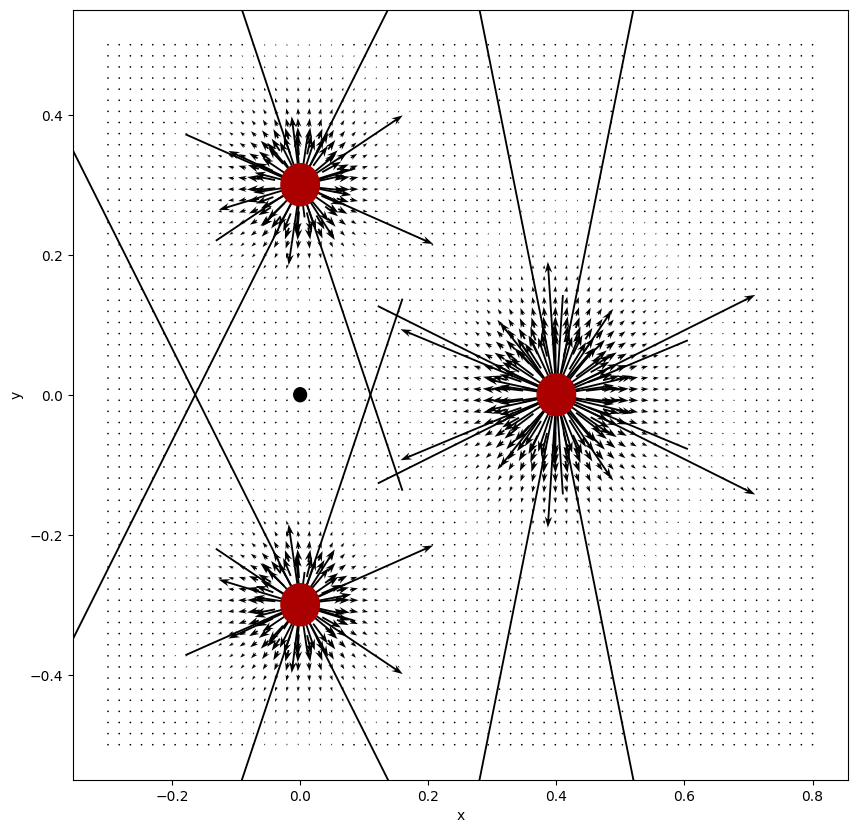

In [24]:
# Grid med x, y punkter
nx, ny = 64, 64 # Antallet punkter i hver retning
x = np.linspace(-0.3, 0.8, nx)  # området vi ønsker å se på
y = np.linspace(-0.5, 0.5, ny)
X, Y = np.meshgrid(x, y) 
# definerer ladningene
Q1=Ladning(2e-6,np.array([0,0.3,0]),"Q1",stille=True)
Q2=Ladning(4e-6,np.array([0.4,0,0]),"Q2",stille=True)
Q3=Ladning(2e-6,np.array([0,-0.3,0]),"Q3",stille=True)

samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)
samling.legg_til(Q3)

Ex=np.zeros_like(X)
Ey=np.zeros_like(X)
i=0
for i in range(nx):
    for j in range(ny):    
        p=np.array([X[i][j],Y[i][j],0]) # koordinat til hvert feltpunkt.
        E=samling.E_felt(p) # felt i punktet
        Ex[i][j]=E[0]
        Ey[i][j]=E[1]
    
    
fig=plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
#ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,density=2, arrowstyle='->', arrowsize=1.5)

plt.quiver(X, Y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)
ax.add_artist(Circle(Q1.posisjon, 0.03, color='#aa0000'))
ax.add_artist(Circle(Q2.posisjon, 0.03, color='#aa0000'))
ax.add_artist(Circle(Q3.posisjon, 0.03, color='#aa0000'))
ax.add_artist(Circle(np.array([0,0,0]), 0.01, color='#000000'))
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

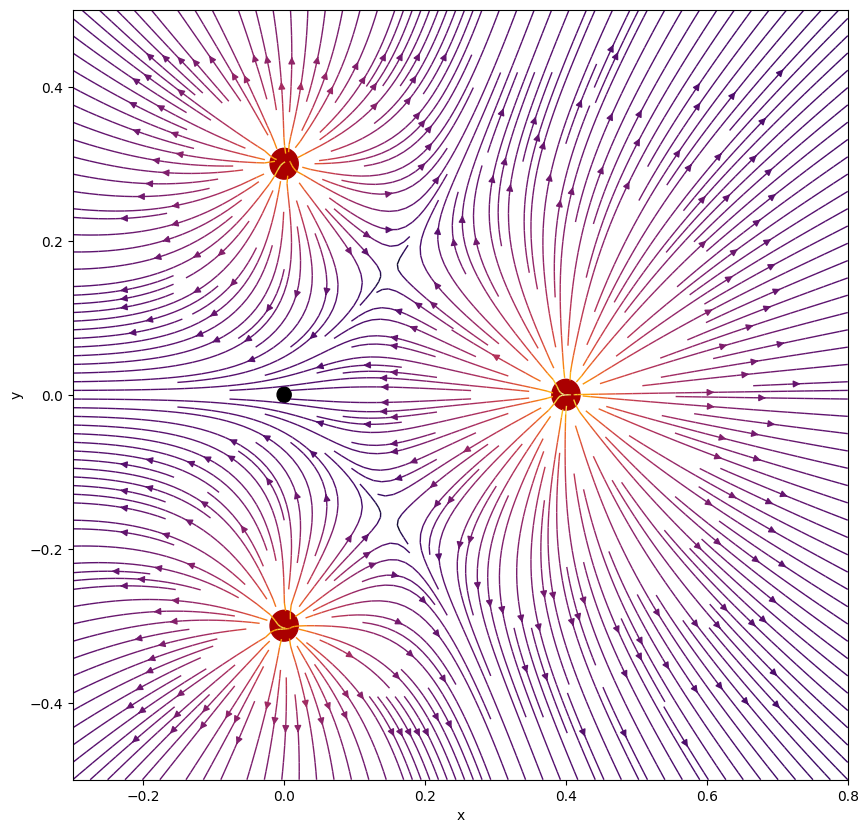

In [25]:
# Grid med x, y punkter
nx, ny = 64, 64
x = np.linspace(-0.3, 0.8, nx)
y = np.linspace(-0.5, 0.5, ny)
X, Y = np.meshgrid(x, y)

Q1=Ladning(2e-6,np.array([0,0.3,0]),"Q1",stille=True)
Q2=Ladning(4e-6,np.array([0.4,0,0]),"Q2",stille=True)
Q3=Ladning(2e-6,np.array([0,-0.3,0]),"Q3",stille=True)

samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)
samling.legg_til(Q3)

Ex=np.zeros_like(X)
Ey=np.zeros_like(X)
i=0
for i in range(nx):
    for j in range(ny):    
        p=np.array([X[i][j],Y[i][j],0]) # koordinat til hvert feltpunkt.
        E=samling.E_felt(p)# felt i punktet
        Ex[i][j]=E[0]
        Ey[i][j]=E[1]
    
# Sørger for en stor lesbar figur.
fig=plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Plotter streamlines med farger og
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,density=3)
# plotter vektorfelt
#plt.quiver(X, Y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)  
ax.add_artist(Circle(Q1.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q1
ax.add_artist(Circle(Q2.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q2
ax.add_artist(Circle(Q3.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q3
ax.add_artist(Circle(np.array([0,0,0]), 0.01, color='#000000')) #Svart prikk i punktet vi ser på 
plt.xlabel('x')
plt.ylabel('y')

In [26]:
#Hjelpefunksjon for å elektrisk felt i x-retning langs x-aksen 
def hjelper(x):
    Q1=Ladning(4e-6,np.array([0,0,0]),"Q1",stille=True)
    Q2=Ladning(1e-6,np.array([0.1,0,0]),"Q2",stille=True)
    p=np.array([x,0,0])
    E=Q1.E_felt(p)+Q2.E_felt(p)
    return E[0] # returnerer bare x-komponent av feltet. Y kansellerer. 

In [30]:
losning=fsolve(hjelper,0.05) # start å lete etter nullpunkt i x=0.5
print(losning)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
# Grid med x, y punkter i området vi ønsker å se på feltet
nx, ny = 64, 64
x = np.linspace(-0.3, 0.3, nx)
y = np.linspace(-0.3, 0.3, ny)
X, Y = np.meshgrid(x, y)

# fyll inn resten!

(0.0, 8000000.0)

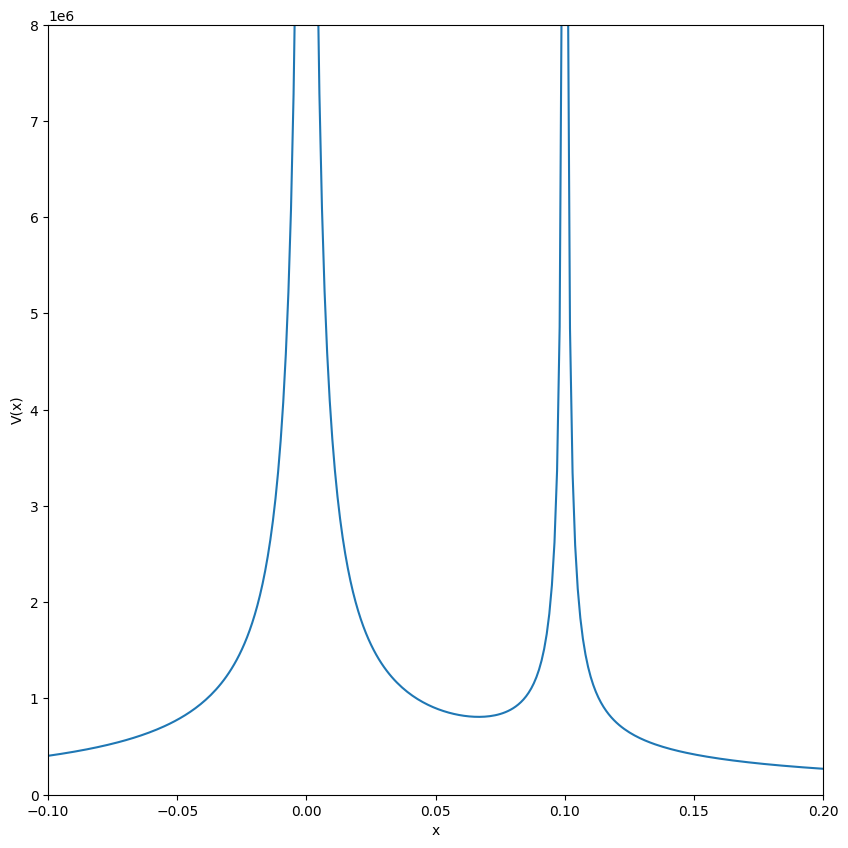

In [28]:
Q1=Ladning(4e-6,np.array([0,0,0]),"Q1",stille=True)
Q2=Ladning(1e-6,np.array([0.1,0,0]),"Q2",stille=True)
samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)

v=[]
xs=[]
for x in np.arange(-0.1,0.2,0.001):
    p=np.array([x,0,0])
    v.append(samling.V(p))
    xs.append(x)

fig=plt.figure(figsize = (10, 10))
plt.plot(xs,v)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.xlim([-0.1,0.2])
plt.ylim([0,0.8e7])